# 2023 NESS Statathon: Insurance Fraud Detection (Kaggle Competition)
---------------------------------------------

**2023 NESS Statathon (Theme 1) - Kaggle Competition**

*This dataset is sourced from the 2023 NESS Statathon competition hosted on Kaggle. Here is the link to the competition:*
* https://www.kaggle.com/competitions/2023-travelers-ness-statathon/overview



*   **Group Members:**
    1. Raheem Abdul
    2. Vinay Reddy
    3. Julienne Mfogmi

**Objective:** As part of the 2023 NESS Statathon Kaggle competition, we aim to assist Travelers Insurance Company's fraud detection department by building a predictive model to identify first-party physical damage fraudulence and uncover key indicators of fraudulent claims. The competition emphasizes fraud detection accuracy and interpretability of fraud drivers.

* The competition evaluates submissions using the weighted F1 score, which we report via the classification report (bottom right corner).
  
  * Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
The dataset, provided by the 2023 NESS Statathon Kaggle competition, consists of first-party physical damage claims from 2015 to 2016, filtered and referred to the fraud detection team for analysis.

For this competition, we use the provided train dataset (which includes the target labels) to build and evaluate our model. The competition rules specify using a consistent random seed for splitting data into train and test sets, prohibit deleting rows in the test partition, and allow transformations on the test partition using `transform()`. Data leakage must be avoided to ensure a fair ranking on the Kaggle leaderboard.

Your work is to build a model on the training data and apply your model to predict the fraud indicator for each claim in the test data.

**Variable Descriptions**
* claim_number - Claim ID **(cannot be used in model)**
* age_of_driver - Age of driver
* gender - Gender of driver
* marital_status - Marital status of driver
* safty_rating - Safety rating index of driver
* annual_income - Annual income of driver
* high_education_ind - Driver’s high education index
* address_change_ind - Whether or not the driver changed living address in past 1 year
* living_status - Driver’s living status, own or rent
* zip_code - Driver’s living address zipcode
* claim_date - Date of first notice of claim
* claim_day_of_week - Day of week of first notice of claim
* accident_site - Accident location, highway, parking lot or local
* past_num_of_claims - Number of claims the driver reported in past 5 years
* witness_present_ind - Witness indicator of the claim
* liab_prct - Liability percentage of the claim
* channel - The channel of purchasing policy
* policy_report_filed_ind - Policy report filed indicator
* claim_est_payout - Estimated claim payout
* age_of_vehicle - Age of first party vehicle
* vehicle_category - Category of first party vehicle
* vehicle_price - Price of first party vehicle
* vehicle_color - Color of first party vehicle
* vehicle_weight - Weight of first party vehicle
* fraud - Fraud indicator (0=no, 1=yes). **This is the response variable.**

# Evaluation Criteria
This analysis is prepared for the AVP of Data Science at Travelers Insurance Company, balancing technical rigor with business-friendly insights, as required by the 2023 NESS Statathon Kaggle competition.

The competition evaluates submissions based on the following:
- **Exploratory Data Analysis (EDA), Data Cleaning, and Feature Engineering**: Ensuring data quality and feature relevance for modeling.
- **Modeling**: Building a robust predictive model for fraud detection.
- **Model Results**: Achieving a high weighted F1 score on the test set, as per competition rules.
- **Interpretability and Discussion**: Providing actionable insights into fraud indicators.
- **Conclusions**: Summarizing findings and recommendations for Travelers Insurance.

In [3]:
!gdown 1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq

Downloading...
From: https://drive.google.com/uc?id=1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq
To: /content/train_2023.csv
100% 2.62M/2.62M [00:00<00:00, 114MB/s]


# Read the Data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('train_2023.csv')
df

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,0,50,F,1.0,66,39117,1,0,Own,50051,...,18,Broker,0,5464.903723,3.0,Large,16786.288450,blue,34183.436390,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,...,81,Broker,0,5448.155974,4.0,Large,20793.298810,black,14528.379730,0
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,94,Broker,1,1858.971699,4.0,Compact,6729.476490,blue,7182.832636,0
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,95,Phone,0,4040.932844,5.0,Compact,24914.267850,gray,47891.788790,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,53,Phone,1,4876.606138,6.0,Medium,17392.419970,black,7546.494014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18995,53,M,0.0,81,39711,1,1,Rent,85070,...,35,Broker,1,9528.853233,7.0,Compact,8285.507871,black,19578.388760,0
18996,18996,39,F,1.0,76,36644,0,1,Rent,80020,...,2,Broker,1,3895.307825,4.0,Medium,11536.180460,silver,17599.182810,0
18997,18997,46,M,1.0,91,38291,0,0,Rent,15019,...,89,Broker,1,2851.046390,6.0,Compact,13601.011440,gray,20711.012560,0
18998,18998,40,M,0.0,87,36895,1,1,Own,20142,...,98,Broker,1,3593.339941,5.0,Compact,38314.191020,red,33472.728910,0


In [68]:
! pip install xgboost imbalanced-learn

# Importing the Libraries

In [4]:
import seaborn as sns                  
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns
from pylab import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from xgboost.sklearn import XGBClassifier
import xgboost as xgb 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [5]:
# import modules we need for EDA and wrangling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression # LR
from sklearn.tree import DecisionTreeRegressor # DTR
from sklearn.ensemble import RandomForestRegressor # RFR
from sklearn.ensemble import GradientBoostingRegressor #GBR

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# permutation testing
from sklearn.inspection import permutation_importance

# Exploratory Data Analysis

## Fraud

In [6]:
# hint: do you have imbalanced data?
df['fraud'].value_counts() # yes you do!

fraud
0    16062
1     2938
Name: count, dtype: int64

1. Estimated claim payout vs Number of past claims by driver

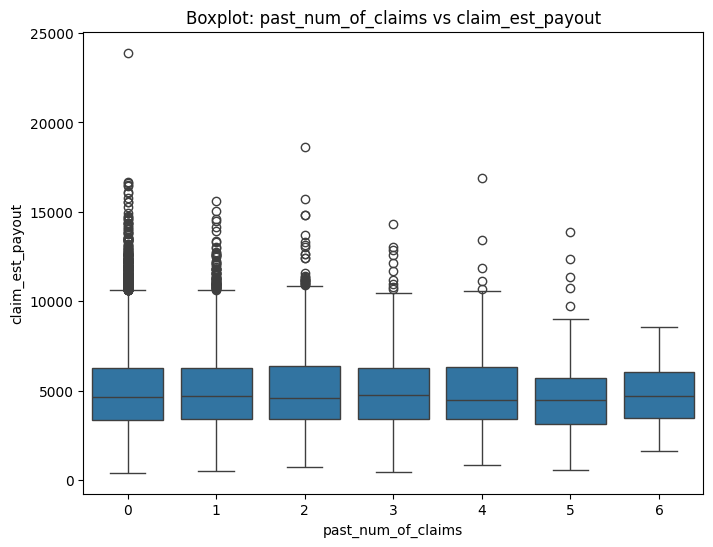

In [7]:
# Create a boxplot of 'claim_est_payout' grouped by 'past_num_of_claims'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='past_num_of_claims', y='claim_est_payout')
plt.xlabel('past_num_of_claims')
plt.ylabel('claim_est_payout')
plt.title('Boxplot: past_num_of_claims vs claim_est_payout')
plt.show()



*   The plot shows that as the number of claims by the driver increase results in decrease in the estimated amount of claim payout. 

* It highlights the inverse relationship between the number of claims by the driver and the estimated amount of claim payout, indicating the potential impact of the driver's claims history on the payout amount they receive for future claims.



2. Estimated claim payout distribution

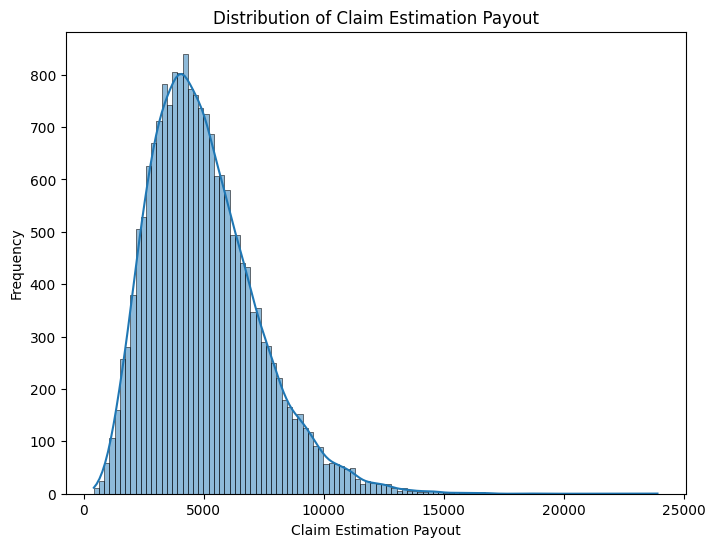

In [8]:
# Distribution of Claim Estimation Payout
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='claim_est_payout', kde=True)
plt.xlabel('Claim Estimation Payout')
plt.ylabel('Frequency')
plt.title('Distribution of Claim Estimation Payout')
plt.show()




*   Very less number of claim payouts beyond the amount of $10,000.


3. Safety rating of driver vs Fraud indicator

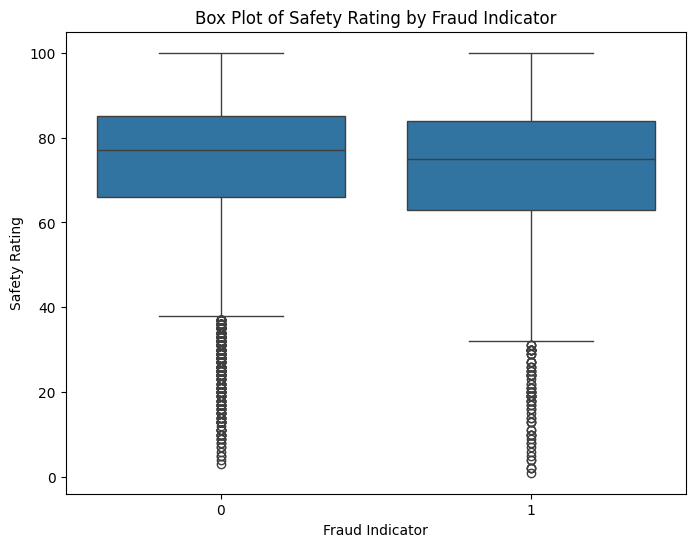

In [9]:
# Box Plot of Safety Rating by Fraud Indicator
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='fraud', y='safty_rating')
plt.xlabel('Fraud Indicator')
plt.ylabel('Safety Rating')
plt.title('Box Plot of Safety Rating by Fraud Indicator')
plt.show()





*   Lower the safety rating of driver the chances of comitting fraud by driver increases. 



## Data Split

In [10]:
# split the data

X = df.drop(['claim_number', 'fraud'],axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
print('train shape')
print(X_train.shape)
print(y_train.shape)

print('\ntest shape')
print(X_test.shape)
print(y_test.shape)

train shape
(15200, 23)
(15200,)

test shape
(3800, 23)
(3800,)


In [15]:
print(df.dtypes)  # Check column data types

claim_number                 int64
age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_date                  object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
fraud                        int64
dtype: object


## Correlations

In [110]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# print(numeric_df.corr())

In [111]:
numeric_df.corr()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight
age_of_driver,1.000000,0.000734,0.058929,-0.000957,0.980030,0.004913,0.002483,0.152753,-0.003302,-0.022601,0.002896,0.003829,0.004973,-0.010650,-0.008440,0.005940,-0.007983,-0.011105,-0.010186
gender,0.000734,1.000000,0.003862,-0.002903,-0.000465,0.000913,0.010975,-0.011892,0.005774,0.012246,0.007191,-0.010489,-0.002831,0.003611,0.010316,0.005957,0.012019,-0.002635,0.006857
marital_status,0.058929,0.003862,1.000000,-0.011623,0.059348,-0.001685,-0.008036,0.005032,0.000461,-0.001547,-0.007336,0.006957,-0.013977,-0.002691,0.009241,0.020445,0.002580,0.012628,-0.003916
safty_rating,-0.000957,-0.002903,-0.011623,1.000000,-0.001051,-0.011371,-0.005815,-0.001201,-0.003448,0.012244,-0.008461,0.000918,0.005240,0.010644,-0.006796,-0.000442,0.006132,-0.013367,-0.004151
annual_income,0.980030,-0.000465,0.059348,-0.001051,1.000000,0.005551,0.004272,0.179675,-0.001949,-0.024521,0.005803,0.004055,0.003342,-0.010842,-0.007888,0.005433,-0.006061,-0.011378,-0.009951
high_education_ind,0.004913,0.000913,-0.001685,-0.011371,0.005551,1.000000,0.006163,0.021510,0.009071,0.020002,-0.000265,-0.007125,-0.001758,0.008253,-0.004886,-0.000705,-0.005872,0.002653,0.009226
address_change_ind,0.002483,0.010975,-0.008036,-0.005815,0.004272,0.006163,1.000000,0.001419,-0.003748,0.004924,-0.011730,-0.005460,0.005762,0.002690,-0.003263,0.001578,0.003964,0.009286,-0.007896
living_status,0.152753,-0.011892,0.005032,-0.001201,0.179675,0.021510,0.001419,1.000000,0.007936,-0.013881,-0.002136,-0.006123,-0.004394,-0.023027,0.001539,-0.000880,-0.007195,-0.006665,-0.001897
accident_site,-0.003302,0.005774,0.000461,-0.003448,-0.001949,0.009071,-0.003748,0.007936,1.000000,-0.007880,0.011640,-0.004610,-0.015696,0.004734,0.008089,0.000537,0.003107,-0.005317,0.017122
past_num_of_claims,-0.022601,0.012246,-0.001547,0.012244,-0.024521,0.020002,0.004924,-0.013881,-0.007880,1.000000,0.003781,-0.009252,0.007524,0.248525,0.004715,0.009194,-0.014090,-0.003749,0.002872


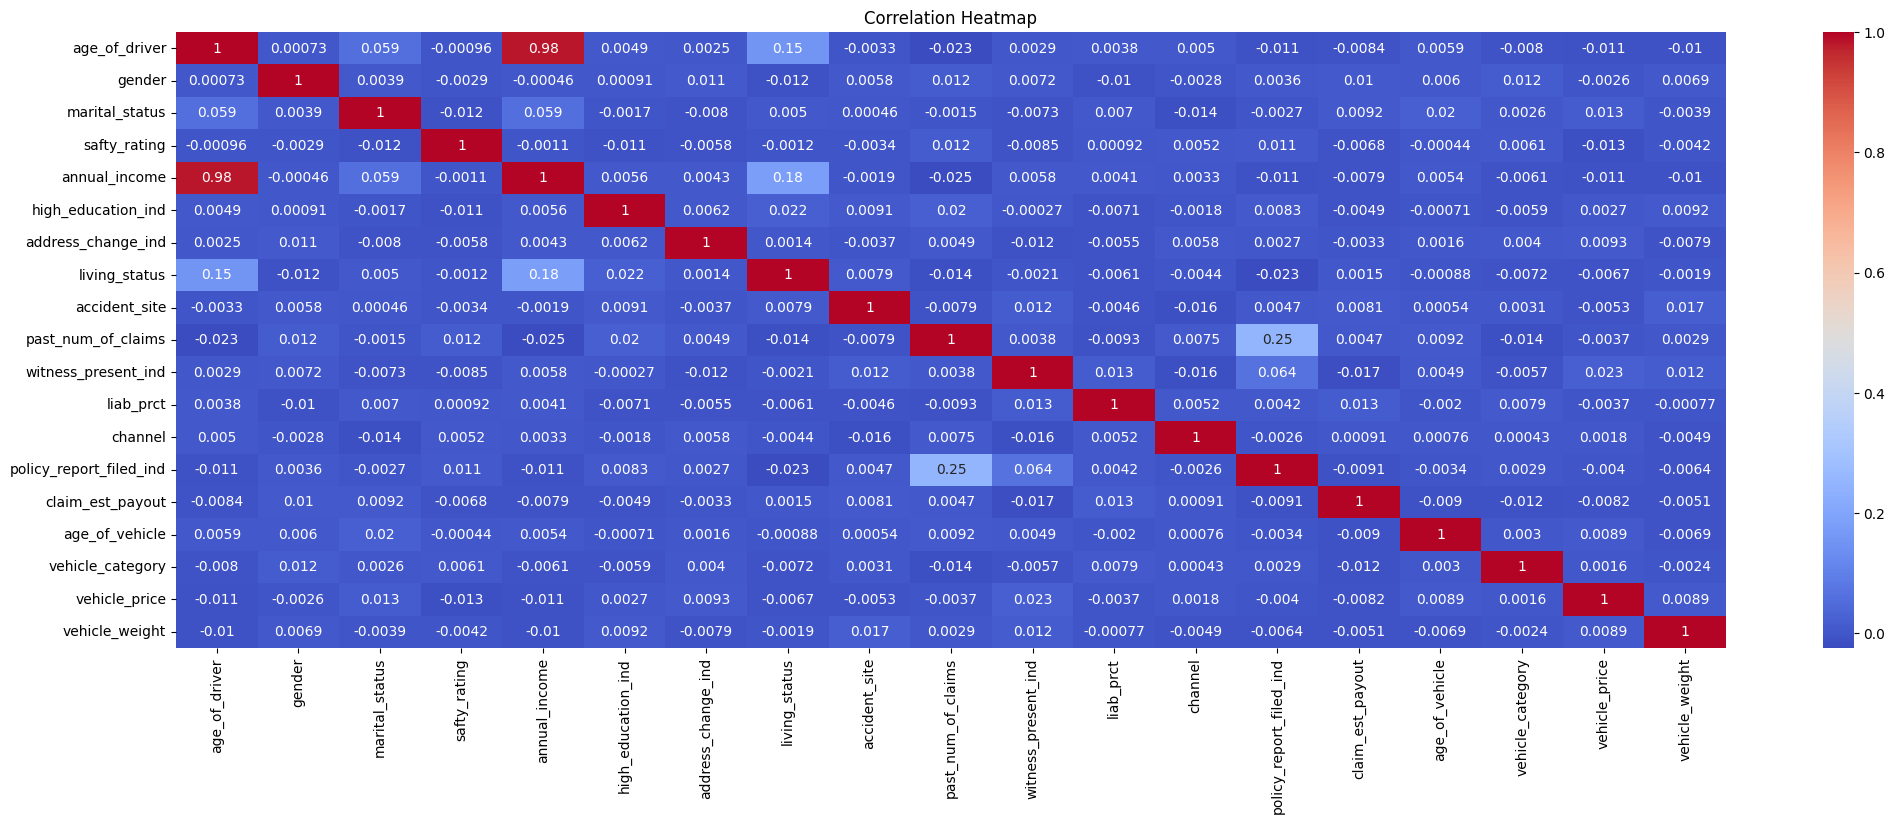

In [112]:
#checking correlation between Target and other features
corr_matrix = numeric_df.corr()
#HEATMAP of Correlation
plt.figure(figsize=(25, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observation: Top 5 variables with highest correlation with target variable before the recoding varaibles:

(High_education_ind) : -0.110389

(Past_no_of _claims): 0.101298

(marital_status) : -0.076830

(witness_present_ind): -0.075908

(address_change) : 0.068253

## Recode the fraud column in Train

In [20]:
# Recode the values in the "fraud" column
y_train = y_train.replace(0,"no").replace(1,"yes")


counts = y_train.value_counts()
print(counts)
y_train


fraud
no     12853
yes     2347
Name: count, dtype: int64


6787      no
6097     yes
11219     no
2512      no
4279     yes
        ... 
11284    yes
11964    yes
5390     yes
860       no
15795    yes
Name: fraud, Length: 15200, dtype: object

## Recode the fraud column in Test

In [21]:
# Recode the values in the "fraud" column
y_test = y_test.replace(0,"no").replace(1,"yes")


counts = y_test.value_counts()
print(counts)
y_test


fraud
no     3209
yes     591
Name: count, dtype: int64


7592      no
12051     no
17353    yes
17873     no
18496     no
        ... 
11770     no
2574      no
14808     no
6556      no
12926     no
Name: fraud, Length: 3800, dtype: object

In [22]:
# check the shapes
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19000, 25)
(15200, 23) (15200,)
(3800, 23) (3800,)


In [23]:
#Concating X_train and y_train into single data frame to clean the data properly
df = pd.concat([X_train,y_train], axis=1)
df.head(15)

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
6787,46,F,1.0,50,38294,1,0,Rent,20116,6/6/2015,...,34,Broker,1,6420.369419,5.0,Large,12421.420480,gray,15723.352070,no
6097,35,M,1.0,77,35552,0,0,Own,50021,1/22/2016,...,32,Phone,1,3338.619246,1.0,Medium,22673.455310,red,15473.532320,yes
11219,63,M,1.0,86,41432,0,1,Own,15003,2/2/2015,...,50,Phone,0,2784.762551,3.0,Compact,9208.723797,blue,25495.825840,no
2512,47,M,1.0,81,38502,1,0,Rent,15009,6/28/2015,...,50,Broker,0,4481.845804,4.0,Large,28051.151580,gray,35830.510490,no
4279,37,M,1.0,82,36102,0,0,Rent,20116,8/24/2016,...,76,Broker,1,4782.534213,8.0,Compact,38076.954140,white,41352.849110,yes
12009,31,F,0.0,86,34315,1,0,Own,20132,2/1/2015,...,92,Phone,1,3120.283535,8.0,Medium,9216.666310,white,22787.225260,no
11550,61,M,1.0,90,41084,1,1,Rent,15035,12/13/2016,...,99,Online,0,5417.928861,2.0,Compact,16678.753040,gray,32570.952560,no
2081,32,F,1.0,92,34652,1,0,Own,50054,5/15/2015,...,72,Broker,1,8549.802364,8.0,Compact,17903.832960,blue,47490.880040,no
11799,25,F,1.0,48,32173,1,0,Rent,15037,1/29/2016,...,47,Broker,1,6362.939526,6.0,Compact,38486.513590,other,38485.787340,no
1959,41,M,1.0,75,37135,0,1,Own,20102,3/17/2015,...,3,Online,0,9082.827058,3.0,Medium,23033.522920,gray,16044.538730,no


In [24]:
#Data Types
df.dtypes

age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_date                  object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
fraud                       object
dtype: object

In [25]:
#Checking for unique values in train data columns
for col in X_train.columns:
  m_stat=df[col].unique()
  print(m_stat)

[ 46  35  63  47  37  31  61  32  25  41  38  54  53  51  56  34  64  59
  88  33  49  58  50  21  45  29  52  26  60  67  42  48  36  30  27  44
  39  40  23  68  28  43  66  72  22  69  20  75  57  82  24  70  55  65
  76  62  77  79  86  84  91  73  74  19  78  80  71  95  81  83 113  18
  94 278  85  92  89  97  87  90 100 229  93  96]
['F' 'M']
[ 1.  0. nan]
[ 50  77  86  81  82  90  92  48  75  73  66  67  64  89  83  58  96  85
  80  57  79  78  88  53  69  84  51  93  87  76  72  68  63  19  65  47
  61  70  56  52  35  29  54  94  71  32  74  91  14  62  95  49  59  30
  46  37  42  33  60  55  41  40  34 100  44  98  20  25  18  17  21  36
  13  38  43  39  31  24  45  28  99  97   9   6  15  11   7  10   8  22
  23  27  26   5  16   2   4   3   1]
[38294 35552 41432 ... 30898 38312 40453]
[1 0]
[0 1]
['Rent' 'Own']
[20116 50021 15003 15009 20132 15035 50054 15037 20102 50037 15001 15042
 85027 80102 50001 85012 20155 50012 20106 15022 50026 80002 85040 80021
 85069 85062 201

In [26]:
X_test.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,...,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
7592,38,F,0.0,89,36375,1,0,Own,50036,10/29/2015,...,NaN,25,Phone,1,7680.245100,6.0,Medium,28774.345150,other,15850.26097
12051,53,F,1.0,75,39694,1,0,Own,85031,5/25/2016,...,0.0,95,Phone,1,2301.310573,2.0,Medium,7664.117156,other,16100.43385
17353,40,F,0.0,61,36881,0,1,Own,20142,8/13/2016,...,0.0,3,Phone,1,9937.850982,4.0,Medium,18207.880540,blue,54435.65309
17873,18,M,0.0,82,28910,1,1,Own,15021,11/17/2015,...,1.0,27,Broker,0,6168.819523,2.0,Compact,24368.446320,silver,25842.79507
18496,38,M,1.0,83,36370,1,0,Own,15042,9/10/2015,...,1.0,50,Phone,1,3452.248072,8.0,Large,29676.320760,blue,34512.56327


In [27]:
# just to show how many missing values we have in df
print(df.isnull().sum())

# we have 113 in witness_present_ind, 18 in claim_est_payout, 6 in age_of_vehicle and 4 in marital_status

age_of_driver                0
gender                       0
marital_status               4
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        113
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            18
age_of_vehicle               6
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64


## Outlier Analysis

on an Average a person lives not more than 100 years. Now, we will do an imputation for the outlier values. Since there is only a very small percentage of missing values, we will simply do a mean/median imputation for the continuous/categorical variables.

In [28]:
# Impute the values in the "age_of_driver" column
X_train.loc[X_train["age_of_driver"] > 100, "age_of_driver"] = np.nan

# Impute the values in the "annual_income" column
X_train.loc[X_train["annual_income"] == -1, "annual_income"] = np.nan

# Impute the values in the "vehicle_price" column
X_train.loc[X_train["vehicle_price"] > 100000, "vehicle_price"] = np.nan 

# Perform the imputation
X_train["age_of_driver"].fillna(X_train["age_of_driver"].median(), inplace=True)
X_train["annual_income"].fillna(X_train["annual_income"].mean(), inplace=True)
X_train["vehicle_price"].fillna(X_train["vehicle_price"].mean(), inplace=True)

C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\2812379347.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["age_of_driver"].fillna(X_train["age_of_driver"].median(), inplace=True)
C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\2812379347.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [29]:
X_train.shape

(15200, 23)

In [30]:
y_train.shape

(15200,)

In [31]:
# Impute the values in the "age_of_driver" column
X_test.loc[X_test["age_of_driver"] > 100, "age_of_driver"] = np.nan

# Impute the values in the "annual_income" column
X_test.loc[X_test["annual_income"] == -1, "annual_income"] = np.nan

# Impute the values in the "vehicle_price" column
X_test.loc[X_test["vehicle_price"] > 100000, "vehicle_price"] = np.nan 

# Perform the imputation
X_test["age_of_driver"].fillna(X_test["age_of_driver"].median(), inplace=True)
X_test["annual_income"].fillna(X_test["annual_income"].mean(), inplace=True)
X_test["vehicle_price"].fillna(X_test["vehicle_price"].mean(), inplace=True)

C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\1391326534.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test["age_of_driver"].fillna(X_test["age_of_driver"].median(), inplace=True)
C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\1391326534.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [32]:
X_test.shape

(3800, 23)

In [33]:
y_test.shape

(3800,)

In [34]:
df.info

<bound method DataFrame.info of        age_of_driver gender  marital_status  safty_rating  annual_income  \
6787              46      F             1.0            50          38294   
6097              35      M             1.0            77          35552   
11219             63      M             1.0            86          41432   
2512              47      M             1.0            81          38502   
4279              37      M             1.0            82          36102   
...              ...    ...             ...           ...            ...   
11284             55      F             0.0            93          40075   
11964             22      F             1.0            77          30907   
5390              40      F             1.0            79          36874   
860               57      F             0.0            80          40453   
15795             56      M             1.0            81          40249   

       high_education_ind  address_change_ind living_st

# Missing Values

## Imputing Train data

In [35]:
print(X_train.isnull().sum())

age_of_driver                0
gender                       0
marital_status               4
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        113
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            18
age_of_vehicle               6
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
dtype: int64


In [36]:
witness = X_train['witness_present_ind']
witness

6787     0.0
6097     0.0
11219    0.0
2512     1.0
4279     1.0
        ... 
11284    0.0
11964    0.0
5390     1.0
860      0.0
15795    1.0
Name: witness_present_ind, Length: 15200, dtype: float64

In [37]:
#checking for most occuring value and imputing it in nan of witness_present_ind
counts = X_train['witness_present_ind'].value_counts()
print(counts)

# Calculate the median of the witness_present column
witness_median = X_train['witness_present_ind'].median()
print(witness_median)

# Impute missing values with the median claim amount
X_train['witness_present_ind'].fillna(witness_median, inplace=True)
missing= X_train['witness_present_ind'].isnull().sum()

print(missing)

witness_present_ind
0.0    11519
1.0     3568
Name: count, dtype: int64
0.0
0


In [38]:
missing_values = X_train['witness_present_ind'].isnull().sum()

# Display the number of missing values
print("Number of missing values in 'witness_present_ind':", missing_values)

Number of missing values in 'witness_present_ind': 0


In [39]:
#As the claim_est_payout column is not normally distributed using median value to impute in missing values of claim_est_payout column
claim_median = X_train['claim_est_payout'].median()
print(claim_median)

# Impute missing values with the median claim amount

X_train['claim_est_payout'].fillna(claim_median, inplace=True)
missing= X_train['claim_est_payout'].isnull().sum()

print(missing)



4675.6291464999995
0


C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\3810338809.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['claim_est_payout'].fillna(claim_median, inplace=True)


In [40]:
#As the age_of_vehicle column is not normally distributed using median value to impute in missing values of age_of_vehicle column
median_vehicle_age = X_train['age_of_vehicle'].median()
print(median_vehicle_age)

# Impute missing values with the median age of vehicle

X_train['age_of_vehicle'].fillna(median_vehicle_age, inplace=True)
missing= X_train['age_of_vehicle'].isnull().sum()

print(missing)



5.0
0


C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\3611575958.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['age_of_vehicle'].fillna(median_vehicle_age, inplace=True)


In [41]:
# shows the value_counts in marital_status variable
X_train['marital_status'].value_counts()


marital_status
1.0    10903
0.0     4293
Name: count, dtype: int64

In [42]:
#As the marital_status column is not normally distributed using median value to impute in missing values of marital_status column
marital_status_median = X_train['marital_status'].median()
print(marital_status_median)

# Impute missing values with the median marital status

X_train['marital_status'].fillna(marital_status_median, inplace=True)
missing= X_train['marital_status'].isnull().sum()

print(missing)


1.0
0


C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\3482531193.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['marital_status'].fillna(marital_status_median, inplace=True)


In [43]:
#Checking the missing values after the imputing
print(X_train.isnull().sum())

# after imputing we dont have any missing values in X_train

age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
dtype: int64


## Imputing Test data 

In [44]:
#Checking the missing values after the imputing
print(X_test.isnull().sum())

# after imputing we dont have any missing values in X_test

age_of_driver               0
gender                      0
marital_status              0
safty_rating                0
annual_income               0
high_education_ind          0
address_change_ind          0
living_status               0
zip_code                    0
claim_date                  0
claim_day_of_week           0
accident_site               0
past_num_of_claims          0
witness_present_ind        30
liab_prct                   0
channel                     0
policy_report_filed_ind     0
claim_est_payout            5
age_of_vehicle              1
vehicle_category            0
vehicle_price               0
vehicle_color               0
vehicle_weight              0
dtype: int64


In [45]:
#checking the no.of witness variable distribution
witness = X_test['witness_present_ind']
witness

7592     NaN
12051    0.0
17353    0.0
17873    1.0
18496    1.0
        ... 
11770    1.0
2574     0.0
14808    0.0
6556     0.0
12926    0.0
Name: witness_present_ind, Length: 3800, dtype: float64

In [46]:
# #As the witness_present_ind column is not normally distributed using median value to impute in missing values of witness_present_ind column
witness_median = X_test['witness_present_ind'].median()
print(witness_median)

# Impute missing values with the median witness_present_ind

X_test['witness_present_ind'].fillna(witness_median, inplace=True)
missing= X_test['witness_present_ind'].isnull().sum()
print(missing)

0.0
0


In [47]:
missing_values = X_test['witness_present_ind'].isnull().sum()

# Display the number of missing values
print("Number of missing values in 'witness_present_ind':", missing_values)

Number of missing values in 'witness_present_ind': 0


In [48]:
#checking for most occuring value and imputing it in nan of claim_est_payout
counts = X_test['claim_est_payout'].value_counts()
print(counts)

claim_est_payout
7680.245100    1
1822.106883    1
6061.594071    1
5031.989330    1
5264.621078    1
              ..
5051.061871    1
3575.345538    1
4501.507324    1
4917.965923    1
3446.580550    1
Name: count, Length: 3795, dtype: int64


In [49]:
# #As the claim_est_payout column is not normally distributed using median value to impute in missing values of claim_est_payout column
claim_status_median = X_test['claim_est_payout'].median()
print(claim_status_median)

# Impute missing values with the median claim_est_payout

X_test['claim_est_payout'].fillna(claim_status_median, inplace=True)
missing= X_test['claim_est_payout'].isnull().sum()

print(missing)


4651.452402
0


C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\2591132683.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['claim_est_payout'].fillna(claim_status_median, inplace=True)


In [50]:
#checking for most occuring value and imputing it in nan of age_of_vehicle
counts = X_test['age_of_vehicle'].value_counts()
print(counts)

age_of_vehicle
5.0     690
4.0     656
3.0     555
6.0     530
7.0     393
2.0     310
8.0     252
1.0     151
9.0     113
10.0     64
0.0      35
11.0     31
12.0     10
13.0      6
14.0      2
15.0      1
Name: count, dtype: int64


In [51]:
#As the age_of_vehicle column is not normally distributed using median value to impute in missing values of age_of_vehicle column
median_vehicle_age = X_test['age_of_vehicle'].median()
print(median_vehicle_age)

# Impute missing values with the median age_of_vehicle

X_test['age_of_vehicle'].fillna(median_vehicle_age, inplace=True)
missing= X_test['age_of_vehicle'].isnull().sum()

print(missing)



5.0
0


C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\3483915353.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['age_of_vehicle'].fillna(median_vehicle_age, inplace=True)


In [52]:
#rechecking the null values after imputing
print(X_test.isnull().sum())

age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
dtype: int64


# Feature Engineering

## recoding columns with numerics for Train data


In [53]:
#recoding mutiple columns with 0 and 1
recode_dict_train = {
    'gender': {'M': 1, 'F': 0},
    'living_status': {'Rent': 0, 'Own': 1},
    'claim_day_of_week' : {'Sunday':0, 'Monday': 1,'Tuesday':2, 'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6 },
    'accident_site': {'Local':0, 'Parking Lot': 1,'Highway':2 },
    'channel': {'Phone': 0, 'Broker': 1,'Online': 2 },
    'vehicle_category': {'Compact':0, 'Medium': 1, 'Large': 2},
    'vehicle_color': {'blue':0,'black':1,'gray':2,'silver':3,'red':4,'white':5,'other':6}
}

for column, mapping in recode_dict_train.items():
    X_train[column] = X_train[column].replace(mapping)

X_train.head(5)

C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\1798251872.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[column] = X_train[column].replace(mapping)


,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,...,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
6787,46.0,0,1.0,50,38294.0,1,0,0,20116,6/6/2015,...,0.0,34,1,1,6420.369419,5.0,2,12421.420480,2,15723.35207
6097,35.0,1,1.0,77,35552.0,0,0,1,50021,1/22/2016,...,0.0,32,0,1,3338.619246,1.0,1,22673.455310,4,15473.53232
11219,63.0,1,1.0,86,41432.0,0,1,1,15003,2/2/2015,...,0.0,50,0,0,2784.762551,3.0,0,9208.723797,0,25495.82584
2512,47.0,1,1.0,81,38502.0,1,0,0,15009,6/28/2015,...,1.0,50,1,0,4481.845804,4.0,2,28051.151580,2,35830.51049
4279,37.0,1,1.0,82,36102.0,0,0,0,20116,8/24/2016,...,1.0,76,1,1,4782.534213,8.0,0,38076.954140,5,41352.84911


Extract the year and month of the claim date for train data

In [54]:
# Convert 'claim_date' column to datetime format
X_train['claim_date'] = pd.to_datetime(X_train['claim_date'])

# Extract the year, month, day, or any desired component from the datetime
X_train['claim_date_year'] = X_train['claim_date'].dt.year
X_train['claim_date_month'] = X_train['claim_date'].dt.month
X_train['claim_date_day'] = X_train['claim_date'].dt.day



In [55]:
df = pd.concat([X_train,y_train], axis=1)
df.head(15)

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,...,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,claim_date_year,claim_date_month,claim_date_day,fraud
6787,46.0,0,1.0,50,38294.0,1,0,0,20116,2015-06-06,...,6420.369419,5.0,2,12421.420480,2,15723.352070,2015,6,6,no
6097,35.0,1,1.0,77,35552.0,0,0,1,50021,2016-01-22,...,3338.619246,1.0,1,22673.455310,4,15473.532320,2016,1,22,yes
11219,63.0,1,1.0,86,41432.0,0,1,1,15003,2015-02-02,...,2784.762551,3.0,0,9208.723797,0,25495.825840,2015,2,2,no
2512,47.0,1,1.0,81,38502.0,1,0,0,15009,2015-06-28,...,4481.845804,4.0,2,28051.151580,2,35830.510490,2015,6,28,no
4279,37.0,1,1.0,82,36102.0,0,0,0,20116,2016-08-24,...,4782.534213,8.0,0,38076.954140,5,41352.849110,2016,8,24,yes
12009,31.0,0,0.0,86,34315.0,1,0,1,20132,2015-02-01,...,3120.283535,8.0,1,9216.666310,5,22787.225260,2015,2,1,no
11550,61.0,1,1.0,90,41084.0,1,1,0,15035,2016-12-13,...,5417.928861,2.0,0,16678.753040,2,32570.952560,2016,12,13,no
2081,32.0,0,1.0,92,34652.0,1,0,1,50054,2015-05-15,...,8549.802364,8.0,0,17903.832960,0,47490.880040,2015,5,15,no
11799,25.0,0,1.0,48,32173.0,1,0,0,15037,2016-01-29,...,6362.939526,6.0,0,38486.513590,6,38485.787340,2016,1,29,no
1959,41.0,1,1.0,75,37135.0,0,1,1,20102,2015-03-17,...,9082.827058,3.0,1,23033.522920,2,16044.538730,2015,3,17,no


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15200 entries, 6787 to 15795
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   age_of_driver            15200 non-null  float64       
 1   gender                   15200 non-null  int64         
 2   marital_status           15200 non-null  float64       
 3   safty_rating             15200 non-null  int64         
 4   annual_income            15200 non-null  float64       
 5   high_education_ind       15200 non-null  int64         
 6   address_change_ind       15200 non-null  int64         
 7   living_status            15200 non-null  int64         
 8   zip_code                 15200 non-null  int64         
 9   claim_date               15200 non-null  datetime64[ns]
 10  claim_day_of_week        15200 non-null  int64         
 11  accident_site            15200 non-null  int64         
 12  past_num_of_claims       15200 non

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15200 entries, 6787 to 15795
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   age_of_driver            15200 non-null  float64       
 1   gender                   15200 non-null  int64         
 2   marital_status           15200 non-null  float64       
 3   safty_rating             15200 non-null  int64         
 4   annual_income            15200 non-null  float64       
 5   high_education_ind       15200 non-null  int64         
 6   address_change_ind       15200 non-null  int64         
 7   living_status            15200 non-null  int64         
 8   zip_code                 15200 non-null  int64         
 9   claim_date               15200 non-null  datetime64[ns]
 10  claim_day_of_week        15200 non-null  int64         
 11  accident_site            15200 non-null  int64         
 12  past_num_of_claims       15200 non

* "claim_date", "claim_day_of_week", and "vehicle_color" are dropped as they have limited impact on fraud prediction.
* These columns may not provide significant insights or correlations with fraudulent claims.
* The focus is on variables that are more relevant and informative for fraud detection modeling.
* These variables have very low correlation values with target variable

In [58]:
#Remove features that do not seem to be related to the target variable

for df in [X_train]:
    df.drop(columns=["claim_date", "claim_day_of_week", "vehicle_color"], inplace=True)

In [59]:
#we drop zip_code.

for df in [X_train]:
    df.drop(columns=["zip_code"], inplace=True)


In [60]:
#info after dropping the columns
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15200 entries, 6787 to 15795
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            15200 non-null  float64
 1   gender                   15200 non-null  int64  
 2   marital_status           15200 non-null  float64
 3   safty_rating             15200 non-null  int64  
 4   annual_income            15200 non-null  float64
 5   high_education_ind       15200 non-null  int64  
 6   address_change_ind       15200 non-null  int64  
 7   living_status            15200 non-null  int64  
 8   accident_site            15200 non-null  int64  
 9   past_num_of_claims       15200 non-null  int64  
 10  witness_present_ind      15200 non-null  float64
 11  liab_prct                15200 non-null  int64  
 12  channel                  15200 non-null  int64  
 13  policy_report_filed_ind  15200 non-null  int64  
 14  claim_est_payout        

In [61]:
#info after dropping the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15200 entries, 6787 to 15795
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            15200 non-null  float64
 1   gender                   15200 non-null  int64  
 2   marital_status           15200 non-null  float64
 3   safty_rating             15200 non-null  int64  
 4   annual_income            15200 non-null  float64
 5   high_education_ind       15200 non-null  int64  
 6   address_change_ind       15200 non-null  int64  
 7   living_status            15200 non-null  int64  
 8   accident_site            15200 non-null  int64  
 9   past_num_of_claims       15200 non-null  int64  
 10  witness_present_ind      15200 non-null  float64
 11  liab_prct                15200 non-null  int64  
 12  channel                  15200 non-null  int64  
 13  policy_report_filed_ind  15200 non-null  int64  
 14  claim_est_payout        

## recoding columns with numerics for Test data

In [62]:
#recoding mutiple columns with 0 and 1 for test
recode_dict = {
    'gender': {'M': 1, 'F': 0},
    'living_status': {'Rent': 0, 'Own': 1},
    'claim_day_of_week' : {'Sunday':0, 'Monday': 1,'Tuesday':2, 'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6 },
    'accident_site': {'Local':0, 'Parking Lot': 1,'Highway':2 },
    'channel': {'Phone': 0, 'Broker': 1,'Online': 2 },
    'vehicle_category': {'Compact':0, 'Medium': 1, 'Large': 2},
    'vehicle_color': {'blue':0,'black':1,'gray':2,'silver':3,'red':4,'white':5,'other':6}
}

for column, mapping in recode_dict.items():
    X_test[column] = X_test[column].replace(mapping)

X_test.head(5)

C:\Users\rahee\AppData\Local\Temp\ipykernel_27112\3765483743.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[column] = X_test[column].replace(mapping)


,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,...,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
7592,38.0,0,0.0,89,36375.0,1,0,1,50036,10/29/2015,...,0.0,25,0,1,7680.245100,6.0,1,28774.345150,6,15850.26097
12051,53.0,0,1.0,75,39694.0,1,0,1,85031,5/25/2016,...,0.0,95,0,1,2301.310573,2.0,1,7664.117156,6,16100.43385
17353,40.0,0,0.0,61,36881.0,0,1,1,20142,8/13/2016,...,0.0,3,0,1,9937.850982,4.0,1,18207.880540,0,54435.65309
17873,18.0,1,0.0,82,28910.0,1,1,1,15021,11/17/2015,...,1.0,27,1,0,6168.819523,2.0,0,24368.446320,3,25842.79507
18496,38.0,1,1.0,83,36370.0,1,0,1,15042,9/10/2015,...,1.0,50,0,1,3452.248072,8.0,2,29676.320760,0,34512.56327


Extract the year and month of the claim date for test data

In [63]:
# Convert 'claim_date' column to datetime format
X_test['claim_date'] = pd.to_datetime(X_test['claim_date'])

# Extract the year, month, day, or any desired component from the datetime
X_test['claim_date_year'] = X_test['claim_date'].dt.year
X_test['claim_date_month'] = X_test['claim_date'].dt.month
X_test['claim_date_day'] = X_test['claim_date'].dt.day


* "claim_date", "claim_day_of_week", and "vehicle_color" are dropped as they have limited impact on fraud prediction.
* These columns may not provide significant insights or correlations with fraudulent claims.
* The focus is on variables that are more relevant and informative for fraud detection modeling.
* These variables have very low correlation values with target variable
* Note that the mean/mode is computed based on the training and Test dataset it is optional to not impute in test data to prevent data leakage.

In [64]:
#Remove features that do not seem to be related to the target variable

for df in [X_test]:
    df.drop(columns=["claim_date", "claim_day_of_week", "vehicle_color"], inplace=True)

In [65]:
#we drop zip_code.

for df in [X_test]:
    df.drop(columns=["zip_code"], inplace=True)


In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 7592 to 12926
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            3800 non-null   float64
 1   gender                   3800 non-null   int64  
 2   marital_status           3800 non-null   float64
 3   safty_rating             3800 non-null   int64  
 4   annual_income            3800 non-null   float64
 5   high_education_ind       3800 non-null   int64  
 6   address_change_ind       3800 non-null   int64  
 7   living_status            3800 non-null   int64  
 8   accident_site            3800 non-null   int64  
 9   past_num_of_claims       3800 non-null   int64  
 10  witness_present_ind      3800 non-null   float64
 11  liab_prct                3800 non-null   int64  
 12  channel                  3800 non-null   int64  
 13  policy_report_filed_ind  3800 non-null   int64  
 14  claim_est_payout         

# Min/Max Scaling

In [69]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from xgboost import XGBClassifier

we need to dummify the categorical features using OneHotEncoder parameter

In [70]:
categorical_features = X_train.columns[X_train.dtypes == object].tolist()
column_transformer = make_column_transformer(
    (OneHotEncoder(drop="first"), categorical_features),
    remainder="passthrough",
)

The numerical features will be re-scaled with MinMaxScaler.

In [71]:
# Fit and transform the training data to avoid data leakage
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
# Balancing the Data
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)

X_train_sampled, y_train_sampled = sm.fit_resample(X_train_scaled, y_train)
Counter(y_train_sampled)

# Counting the values of each class before and after SMOTE
class_counts_before = y_train.value_counts()
class_counts_after = y_train_sampled.value_counts()

print("Class counts before SMOTE sampling:")
print(class_counts_before)
print()

print("Class counts after SMOTE sampling:")
print(class_counts_after)


Class counts before SMOTE sampling:
fraud
no     12853
yes     2347
Name: count, dtype: int64

Class counts after SMOTE sampling:
fraud
no     12853
yes    12853
Name: count, dtype: int64


# Meaningful Plots and tables

## Plots

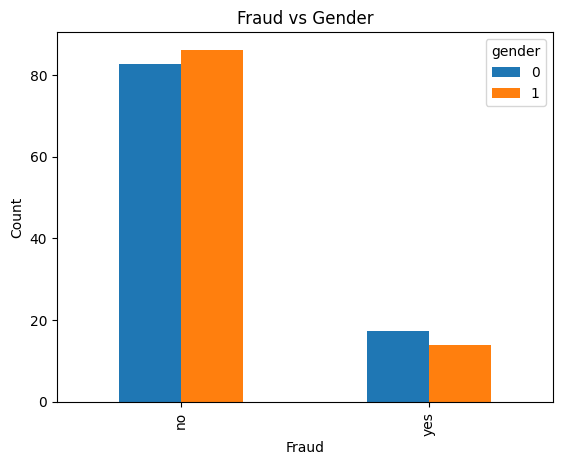

In [73]:
# Concatenate the y_train and X_train DataFrames
df = pd.concat([y_train, X_train], axis=1)

# Group the data by "fraud" and "gender" columns and count the occurrences
grouped = df.groupby(["fraud", "gender"]).size().unstack()

# Compute the percentage of partition
percentage_partition = grouped / grouped.sum() * 100


# Plot the graph
percentage_partition.plot(kind="bar") #stacked=True

# Set the labels and title
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.title("Fraud vs Gender")

# Show the plot
plt.show()


1. from the data distrubution, we found that female is slightly higher risk of performing fraud than male.


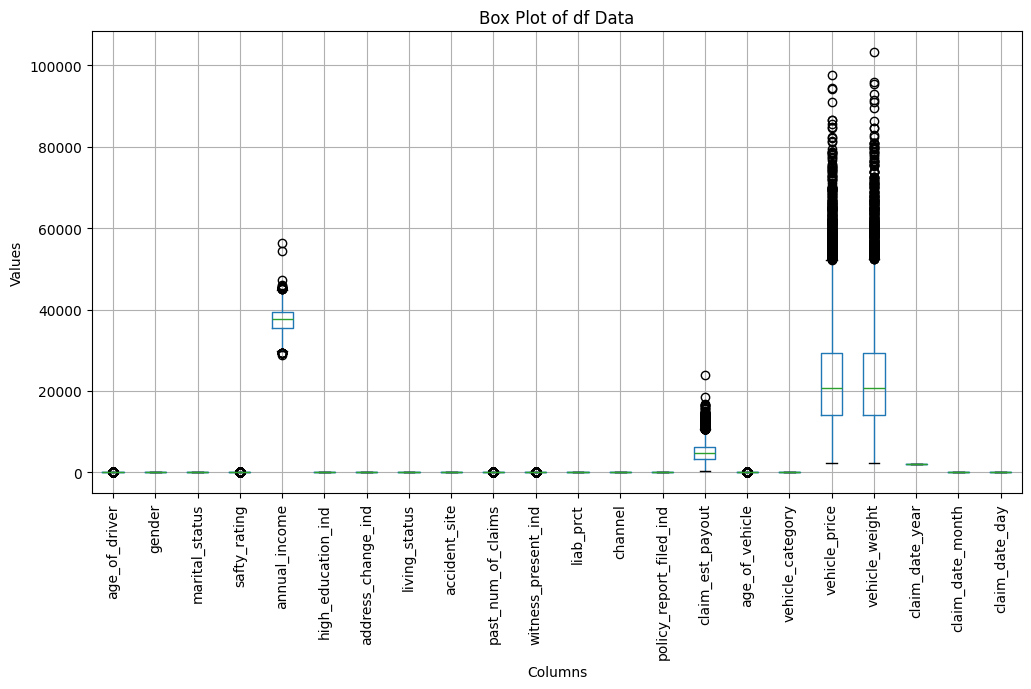

In [74]:
# Create a box plot for each column
plt.figure(figsize=(12, 6)) 
df.boxplot()

plt.title("Box Plot of df Data")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the box plot
plt.show()

2. The boxplot shows outliers in variable. We have addressed the outliers by replacing the outlier values with the median vales. For example, because the age of the drive cannot be grader than 100 years, we replaced those values by the median age. Similarly, annual salary cannot be negative and so we have replaced those values. This was done to suppress the outliers in the test and train dataset.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15200 entries, 6787 to 15795
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fraud                    15200 non-null  object 
 1   age_of_driver            15200 non-null  float64
 2   gender                   15200 non-null  int64  
 3   marital_status           15200 non-null  float64
 4   safty_rating             15200 non-null  int64  
 5   annual_income            15200 non-null  float64
 6   high_education_ind       15200 non-null  int64  
 7   address_change_ind       15200 non-null  int64  
 8   living_status            15200 non-null  int64  
 9   accident_site            15200 non-null  int64  
 10  past_num_of_claims       15200 non-null  int64  
 11  witness_present_ind      15200 non-null  float64
 12  liab_prct                15200 non-null  int64  
 13  channel                  15200 non-null  int64  
 14  policy_report_filed_ind 

In [78]:
#checking correlation between Target and other features
# corr_matrix = df.corr()
# #HEATMAP of Correlation
# plt.figure(figsize=(25, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


3. From the correlation heat map graph our team was able to quickly identify those variables that would be most valuable in our model. We were able to determine that annual_income, claim_est_paout and high_school_ind were our top predictors

In [88]:
# Group by claim_date_day and fraud, then count occurrences
fraud_counts = merged_df.groupby(['claim_date_day', 'fraud']).size().unstack(fill_value=0)

# The resulting DataFrame will have:
# - Index: claim_date_day (0 to 30)
# - Columns: 'yes' and 'no'
# - Values: Count of claims for each fraud status
print(fraud_counts.head())

fraud            no  yes
claim_date_day          
1               457   89
2               427   74
3               433   97
4               441   63
5               397   70


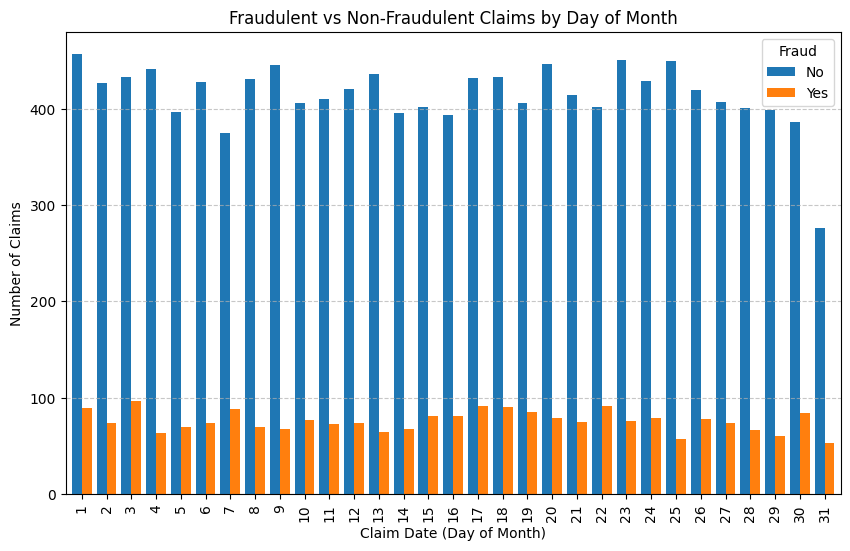

In [89]:
# Plotting a grouped bar plot
fraud_counts.plot(kind='bar', width=0.8, figsize=(10, 6))

# Customize the plot
plt.xlabel('Claim Date (Day of Month)')
plt.ylabel('Number of Claims')
plt.title('Fraudulent vs Non-Fraudulent Claims by Day of Month')
plt.legend(title='Fraud', labels=['No', 'Yes'])  # Adjust based on column order
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

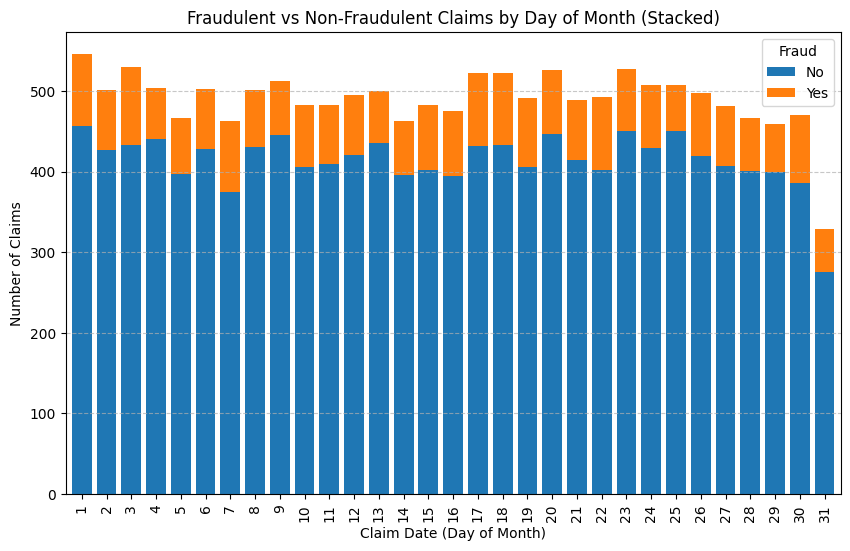

In [90]:
fraud_counts.plot(kind='bar', stacked=True, width=0.8, figsize=(10, 6))

plt.xlabel('Claim Date (Day of Month)')
plt.ylabel('Number of Claims')
plt.title('Fraudulent vs Non-Fraudulent Claims by Day of Month (Stacked)')
plt.legend(title='Fraud', labels=['No', 'Yes'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar plot shows that non-fraudulent claims (350-450 daily) far outnumber fraudulent ones (50-100 daily) across all days. Day 31 has fewer claims (~300), likely due to fewer months having 31 days. The stable fraud rate suggests exploring other factors like claim amount for better fraud prediction.

4. The Time series graph shows the no.of frauds based on the claim date.

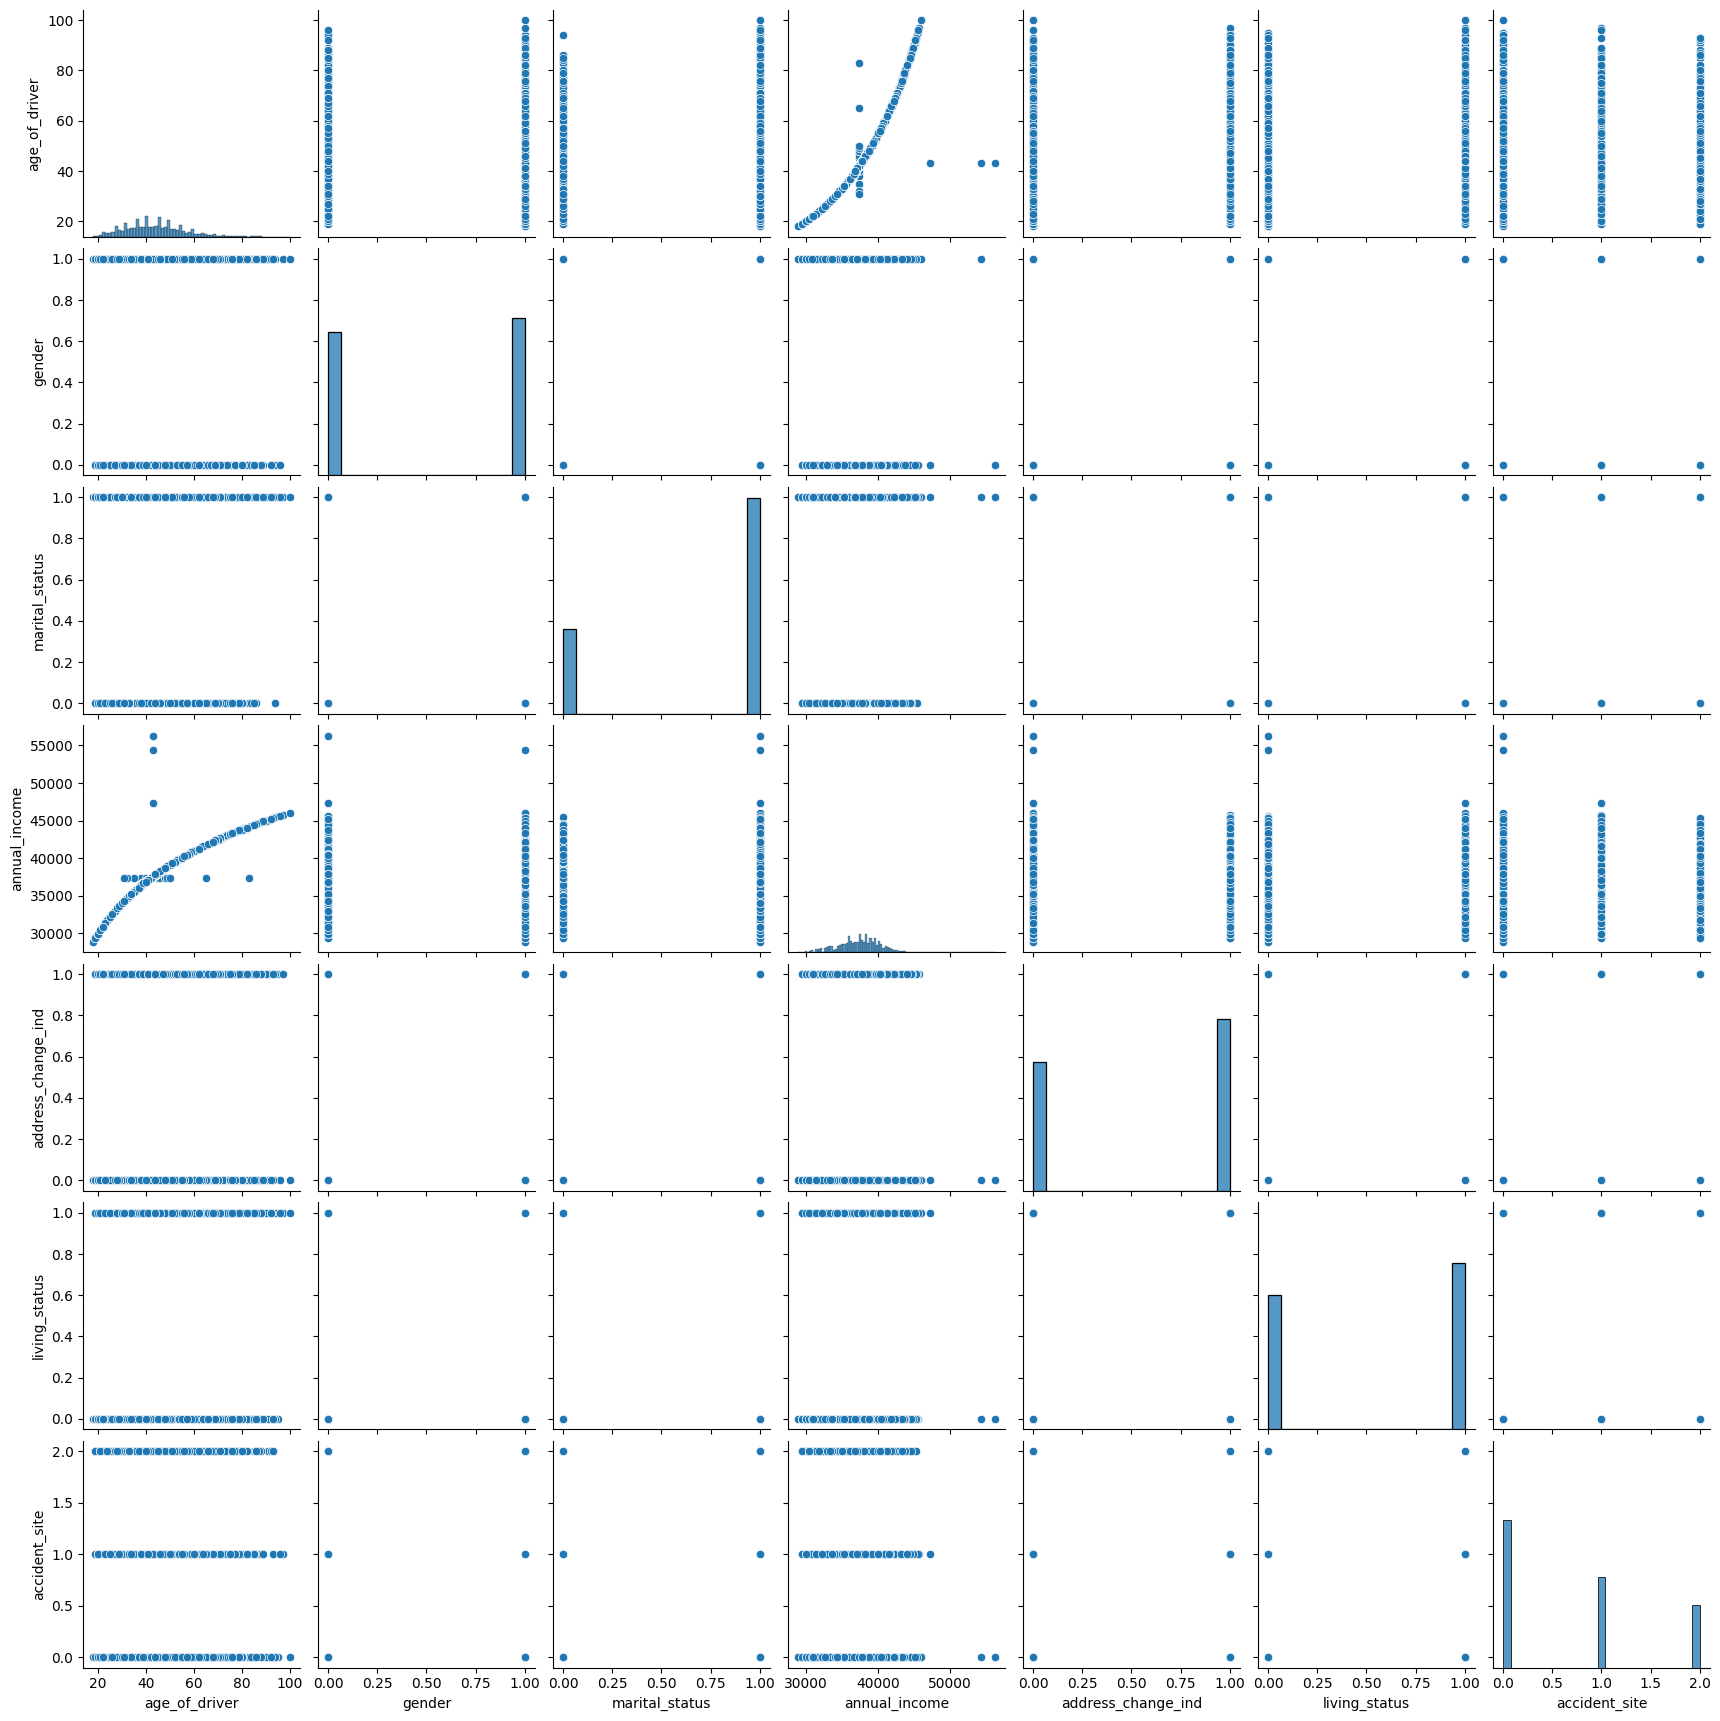

In [91]:
# Seaborn visualization library 
import seaborn as sns 
# Create the default pairplot
columns_to_plot = ['age_of_driver','gender','marital_status','annual_income','address_change_ind','living_status','accident_site']

sns.pairplot(df[columns_to_plot])

plt.show()

5. By examining the scatter plots, we can identify any visible trends or clusters that suggest a relationship between the variables and fraud. For example, we may observe that certain age groups or gender categories have a higher concentration of fraudulent claims. Similarly, certain marital statuses, living statuses, or accident sites may be associated with a higher likelihood of fraud.

## Tables

1. The table shows the summary of the data frame

In [92]:
# Compute summary statistics for numerical variables
summary_stats = df.describe()

# Display the summary statistics
print(summary_stats)


       age_of_driver        gender  marital_status  safty_rating  \
count   15200.000000  15200.000000    15200.000000  15200.000000   
mean       43.545066      0.523224        0.717566     73.470395   
std        11.856776      0.499477        0.450198     15.472854   
min        18.000000      0.000000        0.000000      1.000000   
25%        35.000000      0.000000        0.000000     65.000000   
50%        43.000000      1.000000        1.000000     76.000000   
75%        51.000000      1.000000        1.000000     85.000000   
max       100.000000      1.000000        1.000000    100.000000   

       annual_income  high_education_ind  address_change_ind  living_status  \
count   15200.000000        15200.000000        15200.000000   15200.000000   
mean    37365.612801            0.699211            0.571579       0.553487   
std      2774.098194            0.458616            0.494866       0.497147   
min     28896.000000            0.000000            0.000000       0.00

2. The table gives the categorical distribution to the following variables gender, marital_status, safty_rating, annual_income, accident_site


In [93]:
cat_features = ['gender', 'marital_status', 'safty_rating', 'annual_income', 'accident_site']

# Calculate frequency distribution for each categorical feature
cat_freq_dist = {}
for feature in cat_features:
    freq_dist = df[feature].value_counts(normalize=True)
    cat_freq_dist[feature] = freq_dist

# Convert frequency distributions to a dataframe
cat_freq_dist_df = pd.DataFrame(cat_freq_dist)

# Print categorical feature distribution table
print(cat_freq_dist_df)

           gender  marital_status  safty_rating  annual_income  accident_site
0.0      0.476776        0.282434           NaN            NaN       0.491118
1.0      0.523224        0.717566      0.000066            NaN       0.299737
2.0           NaN             NaN      0.000132            NaN       0.209145
3.0           NaN             NaN      0.000066            NaN            NaN
4.0           NaN             NaN      0.000132            NaN            NaN
...           ...             ...           ...            ...            ...
45729.0       NaN             NaN           NaN       0.000066            NaN
46048.0       NaN             NaN           NaN       0.000066            NaN
47273.0       NaN             NaN           NaN       0.000066            NaN
54333.0       NaN             NaN           NaN       0.000066            NaN
56275.0       NaN             NaN           NaN       0.000066            NaN

[2684 rows x 5 columns]


3. The table gives the count of claims rate in the following years

In [94]:
claims_rates = df.groupby(['past_num_of_claims', 'claim_date_year']).agg({'claim_est_payout': ['mean', 'count']})
claims_rates.columns = ['claims_rate', 'count']
cancel_rates = claims_rates.reset_index()

# display the table
print(claims_rates)

                                    claims_rate  count
past_num_of_claims claim_date_year                    
0                  2015             4970.361413   5274
                   2016             4984.116824   5434
1                  2015             5004.936778   1349
                   2016             5091.907512   1254
2                  2015             5085.503095    559
                   2016             5022.855339    562
3                  2015             5006.309953    245
                   2016             4968.052475    248
4                  2015             5318.426252     69
                   2016             4917.296598     63
5                  2015             4672.025705     57
                   2016             4919.971325     62
6                  2015             4516.494432     10
                   2016             4590.385084     14


4. The table gives the correlation of the dataframe

In [71]:
corr_matrix = df.corr()

# Print correlation matrix
print(corr_matrix)

                         age_of_driver    gender  marital_status  \
age_of_driver                 1.000000  0.000734        0.058929   
gender                        0.000734  1.000000        0.003862   
marital_status                0.058929  0.003862        1.000000   
safty_rating                 -0.000957 -0.002903       -0.011623   
annual_income                 0.980030 -0.000465        0.059348   
high_education_ind            0.004913  0.000913       -0.001685   
address_change_ind            0.002483  0.010975       -0.008036   
living_status                 0.152753 -0.011892        0.005032   
accident_site                -0.003302  0.005774        0.000461   
past_num_of_claims           -0.022601  0.012246       -0.001547   
witness_present_ind           0.002896  0.007191       -0.007336   
liab_prct                     0.003829 -0.010489        0.006957   
channel                       0.004973 -0.002831       -0.013977   
policy_report_filed_ind      -0.010650  0.003611

<ipython-input-71-400f2cb2816b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


5. The table shows the Max,min and avg prices of the vehicle with respective to its age

In [95]:
vehicle_df = df[['age_of_vehicle', 'vehicle_category', 'vehicle_price']]

# group by vehicle age and vehicle category, and calculate mean price
premium_by_channel_cancel = vehicle_df.groupby(['age_of_vehicle', 'vehicle_category'])['vehicle_price'].mean().reset_index()

# pivot the table to display data in the desired format
premium_table = premium_by_channel_cancel.pivot(index='age_of_vehicle', columns='vehicle_category', values='vehicle_price')

# rename the columns for better interpretation
premium_table.columns = ['normal_price','Min_price', 'Max_price']

# round off the values to two decimal places
premium_table = premium_table.round(2)

print(premium_table)

                normal_price  Min_price  Max_price
age_of_vehicle                                    
0.0                 22253.52   19812.59   22978.48
1.0                 23257.68   22396.36   23063.22
2.0                 23063.93   22787.33   23133.90
3.0                 22115.20   22493.07   23279.04
4.0                 23296.52   23240.22   22948.32
5.0                 22723.36   22641.41   23204.85
6.0                 23266.45   23202.52   22806.39
7.0                 23104.40   23644.63   23086.25
8.0                 23092.96   24118.17   22653.21
9.0                 24353.23   23081.49   21737.81
10.0                20919.15   22688.31   24046.99
11.0                22543.75   22855.00   21345.54
12.0                21829.73   26435.00   21293.00
13.0                18260.02   29458.75   23504.42
14.0                28901.88   34528.67   34474.34
16.0                     NaN        NaN   20361.01


# Modeling

In [96]:
import numpy as np
import pandas as pd
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from xgboost import XGBClassifier


## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Create a Random Forest model
model_RFC = RandomForestClassifier()

# Train the model using X_train and y_train
model_RFC.fit(X_train_sampled, y_train_sampled)

# Predict the target variable using X_train
y_train_pred = model_RFC.predict(X_train_sampled)
y_test_pred = model_RFC.predict(X_test_scaled)

# Calculate the F1 score of the model on the training data
f1 = f1_score(y_test, y_test_pred,average='weighted') #pos_label='no'

# Print the F1 score
print("Testing F1 Score:", f1)

# Generate classification reports and confusion matrices for the train and test partitions
print("Classification Report (Train Data):\n", classification_report(y_train_sampled, y_train_pred))
print("Confusion Matrix (Train Data):\n", confusion_matrix(y_train_sampled, y_train_pred))
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))

Testing F1 Score: 0.7928697300346782
Classification Report (Train Data):
               precision    recall  f1-score   support

          no       1.00      1.00      1.00     12853
         yes       1.00      1.00      1.00     12853

    accuracy                           1.00     25706
   macro avg       1.00      1.00      1.00     25706
weighted avg       1.00      1.00      1.00     25706

Confusion Matrix (Train Data):
 [[12853     0]
 [    0 12853]]
Classification Report (Test Data):
               precision    recall  f1-score   support

          no       0.85      0.98      0.91      3209
         yes       0.41      0.09      0.15       591

    accuracy                           0.84      3800
   macro avg       0.63      0.53      0.53      3800
weighted avg       0.79      0.84      0.79      3800

Confusion Matrix (Test Data):
 [[3129   80]
 [ 535   56]]


We have tried several other techniques like modifying threshold from 0.5 to 0.7 and 0.4 but that couldn't improve the f1 score. aditionally we also tried hyper parameter tuning and added the tuning parameters but it couldn't extract the best model.

# Interpretability and Discussion 

## Permutation importance

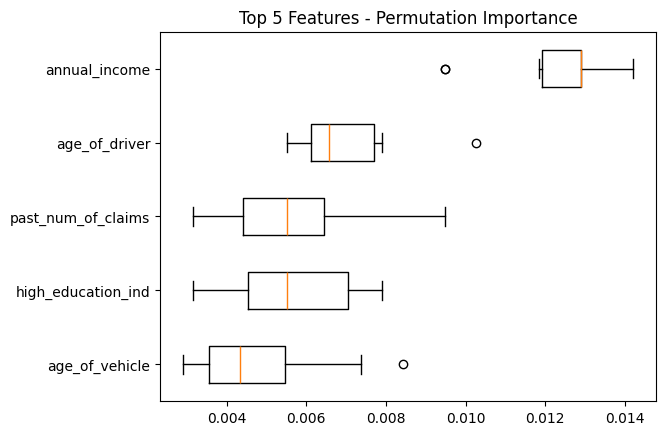

In [98]:
import warnings

# permutation importance is on X_test
from sklearn.inspection import permutation_importance

clf = model_RFC

#suppressing the warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# Perform permutation importance with 10 repeats
result = permutation_importance(clf, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Get the feature importance scores
importance_scores = result.importances_mean

# Get the indices of the top 5 features
top5_indices = importance_scores.argsort()[-5:]

# Get the names of the top 5 features
top5_features = X_test.columns[top5_indices]


# Create a box plot to visualize the feature importance
plt.boxplot(result.importances[top5_indices].T, vert=False, labels=top5_features)
plt.title('Top 5 Features - Permutation Importance')
plt.show()


## Partial Dependence

In [99]:
!pip install pulp 
!pip install pycebox
from pycebox.ice import ice, ice_plot

   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
    --------------------------------------- 0.3/17.7 MB ? eta -:--:--
    --------------------------------------- 0.3/17.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/17.7 MB 508.0 kB/s eta 0:00:34
   - -------------------------------------- 0.5/17.7 MB 508.0 kB/s eta 0:00:34
   - -------------------------------------- 0.8/17.7 MB 558.9 kB/s eta 0:00:31
   - -------------------------------------- 0.8/17.7 MB 558.9 kB/s eta 0:00:31
   - -------------------------------------- 0.8/17.7 MB 558.9 kB/s eta 0:00:31
   -- ------------------------------------- 1.0/17.7 MB 535.4 kB/s eta 0:00:32
   -- ------------------------------------- 1.0/17.7 MB 535.4 kB/s eta 0:00:32
   -- ------------------------------------- 1.3/17.7 MB 524.3 kB/s eta 0:00:32
   -- ------------

In [101]:
train_X_df = pd.DataFrame(X_train, columns=X_train.columns)
train_X_df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,accident_site,past_num_of_claims,...,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight,claim_date_year,claim_date_month,claim_date_day
6787,46.0,0,1.0,50,38294.0,1,0,0,1,0,...,1,1,6420.369419,5.0,2,12421.420480,15723.35207,2015,6,6
6097,35.0,1,1.0,77,35552.0,0,0,1,2,2,...,0,1,3338.619246,1.0,1,22673.455310,15473.53232,2016,1,22
11219,63.0,1,1.0,86,41432.0,0,1,1,0,0,...,0,0,2784.762551,3.0,0,9208.723797,25495.82584,2015,2,2
2512,47.0,1,1.0,81,38502.0,1,0,0,1,0,...,1,0,4481.845804,4.0,2,28051.151580,35830.51049,2015,6,28
4279,37.0,1,1.0,82,36102.0,0,0,0,0,2,...,1,1,4782.534213,8.0,0,38076.954140,41352.84911,2016,8,24


In [102]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=3, 
                  ncols=3, figsize=(12, 12), sharex=False, sharey=True,
                  num_grid_points = 50,
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the 
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

Index(['age_of_vehicle', 'high_education_ind', 'past_num_of_claims',
       'age_of_driver', 'annual_income'],
      dtype='object')


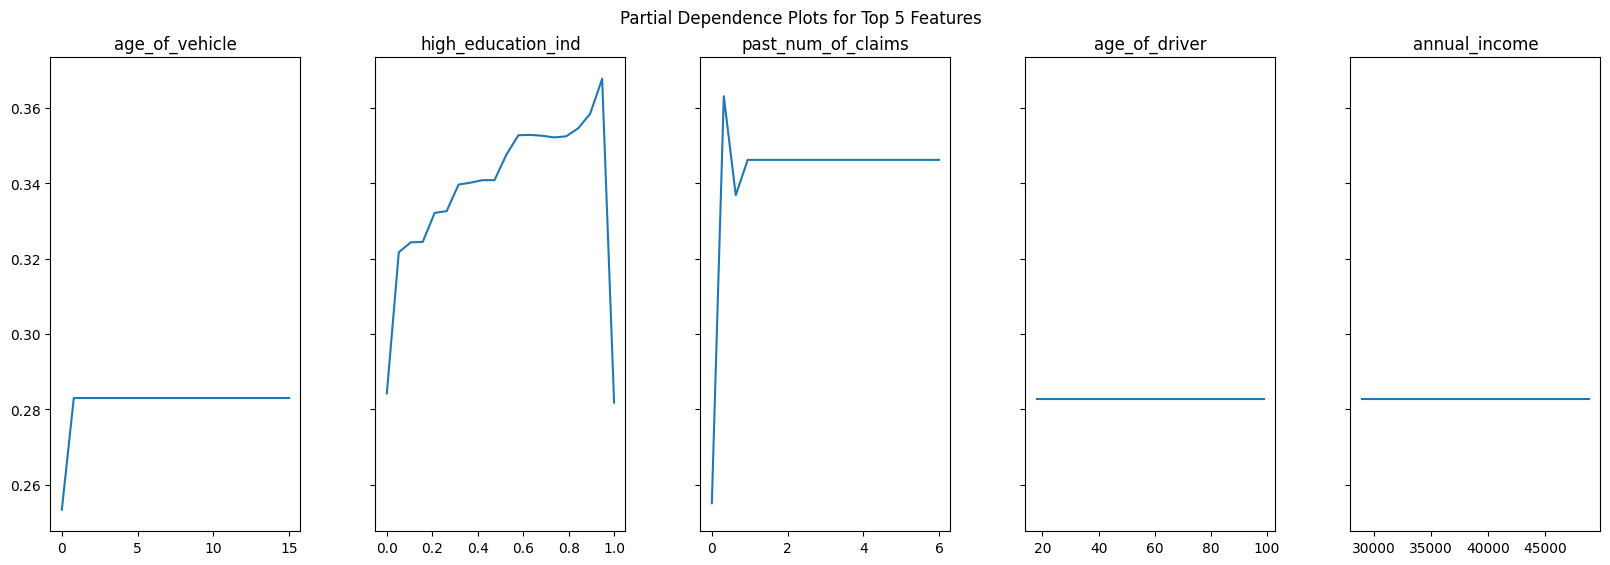

In [103]:
features = top5_features
print(features)

def plot_partial_dependence_alt(model, X, feature_index, ax, grid_resolution=20):
    X_temp = X.copy()
    grid = np.linspace(X_temp.iloc[:, feature_index].min(), X_temp.iloc[:, feature_index].max(), num=grid_resolution)
    pdp_values = []

    for value in grid:
        X_temp.iloc[:, feature_index] = value
        preds = model.predict_proba(X_temp)[:, 1]
        pdp_values.append(np.mean(preds))

    ax.plot(grid, pdp_values)
    ax.set_title(X.columns[feature_index])

# Convert X_test to a pandas DataFrame
X_test = pd.DataFrame(X_test)

# Recode sorted_idx to contain column names instead of indices
sorted_cols = [X_test.columns[i] for i in top5_indices]

# Create partial dependence plots for the top 5 features
fig, ax = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
ax = np.ravel(ax)

for i, col in enumerate(sorted_cols):
    plot_partial_dependence_alt(model_RFC, X_test, X_test.columns.get_loc(col), ax[i])
    ax[i].set_title(col)

plt.suptitle('Partial Dependence Plots for Top 5 Features')
plt.subplots_adjust(top=0.9, wspace=0.3)
plt.show()


## **Business Recommendations**

* **Past Number of Claims:** The correlation is 0.101, For claimants with a large number of prior claims, we have to scrutinize them strictly for extra verification processes. In order to reduce the possible fraud risks, it is crucial to thoroughly evaluate such claims because this characteristic may suggest a higher possibility of fraudulent activity that incurs loss to the business.

* **Witness Present Indicator:** The correlation is -0.075 which is higher correlation with the target variable (fraud). If the witnesses are present, it enhances the transparency of the claims. This variable implies that the presence of a witness may improve the accuracy and legitimacy of a claim. Usually considered stronger evidence and less likely to be fraudulent, which helps in detecting fraudulent claims.

* **High Education Indicator:** The correlation is -0.1103, Carefully considering claims made by someone with a high degree of education. Higher-educated people's are tending towards fraud claims that might need to be examined more closely to make sure they're true.

* **Driver's Age:** The correlation is -0.064449, Insurance companies should pay close attention to allegations involving drivers in particular age groups. Younger and older drivers' claims should be examined more closely, as fraud may be more likely to occur in these age groups. Due to their inexperience.

* **Annual Income:** The correlation is -0.050876, Companies should pay more attention to claims from those who make a particular amount of money. Due to their assumed financial security, claimants with higher incomes may be inclined to make fraudulent claims, whereas claimants with lower incomes may experience greater financial stress that might lead to fraud.

**Summary:**
1. Implement automated fraud detection using predictive models based on key variables.
2. Streamline investigation processes and allocate resources based on risk profiles.
3. Conduct fraud awareness programs, continuously refine models, and foster collaboration for effective fraud prevention.

# **Conclusion**


1. Introduction: In the 2023 NESS Statathon Kaggle competition, our goal was to develop a robust machine learning model to classify insurance claims as fraudulent or legitimate. Detecting fraud in insurance claims is crucial for minimizing financial losses and ensuring fair compensation for policyholders. We aimed to create an accurate and reliable model that could assist in the early identification of fraudulent claims.

2. Data collection: We started by exploring the  insurance claims data, which included all the variables like  age_of_driver, high_education_ind, witness_present_ind, policy_report_filed_ind,etc. We handled missing values by imputing them rather than excluding them to avoid data loss, encoded category variables using one hod encoding and dummy variables, and thoroughly cleaned the data.

3. Data Preparation: We began by collecting historical data on insurance claims, including various attributes such as age_of_driver, high_education_ind, witness_present_ind, policy_report_filed_ind, etc.. We performed thorough data cleaning, handling missing values, and encoding categorical variables. Additionally, we conducted feature scaling to normalize the numerical features and reduce the impact of varying scales. Additionally we could identify outliers in few variables and were imputed with median values. In order to equalize the numerical characteristics and lessen the impact of different scales, we also performed  transform scaling, however we tried min/max scaling too.


4. Model Exploration: We explored several classification models, including Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machines. Each model was selected based on its ability to handle binary classification tasks and its suitability for our dataset's size and complexity. We considered factors such as interpretability, computational efficiency, and previous success in fraud detection tasks. Our major focus was on f1 score, where the model f1-score was considered in selecting the best model. 


5. Results: After comparing the models, we discovered that Random Forest performed consistently, attaining an F1 score of 0.79 on the test set. This model demonstrated a high capability to identify both fraudulent and legitimate claims accurately. We found that the  Random Forest was helpful in capturing complicated interactions and minimizing overfitting.


6. The efficiency of Random Forest in accurately recognizing fraudulent claims was demonstrated by our classification model for insurance fraud claims. In the longer run, our methodology benefits both the insurance company and policyholders by helping in the mitigation of financial losses and detecting fraudlent customers.

# **Appendix**

## Logistic Regression

In [104]:
def modeling(X_train, y_train, steps):
    pipeline = make_pipeline(*steps)
    pipeline.fit(X_train, y_train)
    if isinstance(pipeline._final_estimator, RandomizedSearchCV) or isinstance(pipeline._final_estimator, GridSearchCV):
        print(f"Best params: {pipeline._final_estimator.best_params_}")
    return pipeline

In [105]:
lr_clf = LogisticRegression()
# lr_pipeline = modeling(X_train, y_train, [column_transformer, scaler, lr_clf])

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# Assuming you have a classification model called 'model' and training data X_train, y_train
# Train the model using X_train and y_train
lr_clf.fit(X_train_sampled, y_train_sampled)

# Predict the target variable using X_train
y_train_pred = lr_clf.predict(X_train_sampled)
y_test_pred = lr_clf.predict(X_test_scaled)

# Calculate the F1 score of the model on the training data
f1 = f1_score(y_test, y_test_pred,average='weighted')

# Print the F1 score
print("Training F1 Score:", f1)

# Generate classification reports and confusion matrices for the train and test partitions
print("Classification Report (Train Data):\n", classification_report(y_train_sampled, y_train_pred))
print("Confusion Matrix (Train Data):\n", confusion_matrix(y_train_sampled, y_train_pred))
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))


Training F1 Score: 0.6795540984203209
Classification Report (Train Data):
               precision    recall  f1-score   support

          no       0.63      0.63      0.63     12853
         yes       0.63      0.64      0.63     12853

    accuracy                           0.63     25706
   macro avg       0.63      0.63      0.63     25706
weighted avg       0.63      0.63      0.63     25706

Confusion Matrix (Train Data):
 [[8078 4775]
 [4665 8188]]
Classification Report (Test Data):
               precision    recall  f1-score   support

          no       0.90      0.63      0.74      3209
         yes       0.24      0.63      0.35       591

    accuracy                           0.63      3800
   macro avg       0.57      0.63      0.54      3800
weighted avg       0.80      0.63      0.68      3800

Confusion Matrix (Test Data):
 [[2018 1191]
 [ 219  372]]


## Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model using X_train and y_train
model.fit(X_train_sampled, y_train_sampled)

# Predict the target variable using X_train
y_train_pred = model.predict(X_train_sampled)
y_test_pred = model.predict(X_test_scaled)

# Calculate the F1 score of the model on the training data
f1 = f1_score(y_test, y_test_pred,average='weighted') #pos_label='no'


# Print the F1 score
print("Testing F1 Score:", f1)

# Generate classification reports and confusion matrices for the train and test partitions
print("Classification Report (Train Data):\n", classification_report(y_train_sampled, y_train_pred))
print("Confusion Matrix (Train Data):\n", confusion_matrix(y_train_sampled, y_train_pred))
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))


Testing F1 Score: 0.7321983574367795
Classification Report (Train Data):
               precision    recall  f1-score   support

          no       1.00      1.00      1.00     12853
         yes       1.00      1.00      1.00     12853

    accuracy                           1.00     25706
   macro avg       1.00      1.00      1.00     25706
weighted avg       1.00      1.00      1.00     25706

Confusion Matrix (Train Data):
 [[12853     0]
 [    0 12853]]
Classification Report (Test Data):
               precision    recall  f1-score   support

          no       0.85      0.81      0.83      3209
         yes       0.19      0.24      0.21       591

    accuracy                           0.72      3800
   macro avg       0.52      0.52      0.52      3800
weighted avg       0.75      0.72      0.73      3800

Confusion Matrix (Test Data):
 [[2585  624]
 [ 448  143]]


## GBC

In [108]:
# Create a Gradient Boosting model
model = GradientBoostingClassifier()

# Train the model using X_train and y_train
model.fit(X_train_sampled, y_train_sampled)

# Predict the target variable using X_train
y_train_pred = model.predict(X_train_sampled)
y_test_pred = model.predict(X_test_scaled)

# Calculate the F1 score of the model on the training data
f1 = f1_score(y_test, y_test_pred,average='weighted') #pos_label='no'


# Print the F1 score
print("Testing F1 Score:", f1)

# Generate classification reports and confusion matrices for the train and test partitions
print("Classification Report (Train Data):\n", classification_report(y_train_sampled, y_train_pred))
print("Confusion Matrix (Train Data):\n", confusion_matrix(y_train_sampled, y_train_pred))
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))



Testing F1 Score: 0.7890722510146259
Classification Report (Train Data):
               precision    recall  f1-score   support

          no       0.84      0.99      0.91     12853
         yes       0.99      0.81      0.89     12853

    accuracy                           0.90     25706
   macro avg       0.91      0.90      0.90     25706
weighted avg       0.91      0.90      0.90     25706

Confusion Matrix (Train Data):
 [[12708   145]
 [ 2458 10395]]
Classification Report (Test Data):
               precision    recall  f1-score   support

          no       0.85      0.98      0.91      3209
         yes       0.43      0.07      0.12       591

    accuracy                           0.84      3800
   macro avg       0.64      0.53      0.51      3800
weighted avg       0.79      0.84      0.79      3800

Confusion Matrix (Test Data):
 [[3157   52]
 [ 551   40]]


## SVC

In [109]:
from sklearn.svm import SVC

# Create an SVM model
model = SVC()

# Train the model using X_train and y_train
model.fit(X_train_sampled, y_train_sampled)

# Predict the target variable using X_train
y_train_pred = model.predict(X_train_sampled)
y_test_pred = model.predict(X_test_scaled)

# Calculate the F1 score of the model on the training data
f1 = f1_score(y_test, y_test_pred,average='weighted') #pos_label='no'


# Print the F1 score
print("Testing F1 Score:", f1)

# Generate classification reports and confusion matrices for the train and test partitions
print("Classification Report (Train Data):\n", classification_report(y_train_sampled, y_train_pred))
print("Confusion Matrix (Train Data):\n", confusion_matrix(y_train_sampled, y_train_pred))
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))


Testing F1 Score: 0.7104092534394302
Classification Report (Train Data):
               precision    recall  f1-score   support

          no       0.83      0.76      0.79     12853
         yes       0.78      0.84      0.81     12853

    accuracy                           0.80     25706
   macro avg       0.80      0.80      0.80     25706
weighted avg       0.80      0.80      0.80     25706

Confusion Matrix (Train Data):
 [[ 9813  3040]
 [ 2061 10792]]
Classification Report (Test Data):
               precision    recall  f1-score   support

          no       0.87      0.73      0.79      3209
         yes       0.21      0.39      0.27       591

    accuracy                           0.68      3800
   macro avg       0.54      0.56      0.53      3800
weighted avg       0.76      0.68      0.71      3800

Confusion Matrix (Test Data):
 [[2334  875]
 [ 359  232]]
